In [4]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import datetime
import numpy as np


In [19]:
#Create list of Worlds Day 2 players+decks from Limitless

def limitless_players_and_decks(url):

    # Fetch the HTML content
    response = requests.get(url)
    if response.status_code != 200:
        print("Failed to get the webpage")
        exit()

    # Initialize BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Lists to hold the player names and decks
    player_names = []
    decks = []

    # Loop through each player row in the HTML
    for row in soup.select('tr'):
        player = row.select_one('a[href^="/players"]')
        deck = row.select_one('span[data-tooltip]')

        if player and deck:
            player_names.append(player.text)

            deck_tooltip = deck['data-tooltip']
            decks.append(deck_tooltip)

    # Create a DataFrame
    player_decks = pd.DataFrame({
        'Player Name': player_names,
        'Deck': decks
    })

    # Print the DataFrame or save it to a CSV file
    player_decks['Player Name'] = player_decks['Player Name'].str.strip().str.lower()

    return player_decks


#clean the standings from Julien's code
def clean_standings(csv):
    matches = pd.read_csv(csv, header=None)
    matches[['Player1', 'Country1', 'Player2', 'Country2', 'Result']] = matches[0].str.extract(r'([\w\s-]+)\s\[(\w+)\]\t([\w\s-]+)\s\[(\w+)\]\t([WLT])')
    matches.drop(0, axis=1, inplace=True)
    players = matches[['Player1', 'Player2', 'Result']].copy()
    players['Player1'] = players['Player1'].str.strip().str.lower()
    players['Player2'] = players['Player2'].str.strip().str.lower()
    players=players.dropna()
    return players

In [110]:
pittsburgh_decks = limitless_players_and_decks('https://limitlesstcg.com/tournaments/383')
pittsburgh_standings = clean_standings("/Users/horacemann/pokemon/2023-2024 metagame analysis/pittsburgh.csv")

barcelona_decks = limitless_players_and_decks("https://limitlesstcg.com/tournaments/384")
barcelona_standings = clean_standings("/Users/horacemann/pokemon/2023-2024 metagame analysis/barcelona.csv")

curitiba_decks = limitless_players_and_decks("https://limitlesstcg.com/tournaments/385")
curitiba_standings = clean_standings("/Users/horacemann/pokemon/2023-2024 metagame analysis/curitiba.csv")

peoria_decks = limitless_players_and_decks("https://limitlesstcg.com/tournaments/386")
peoria_standings = clean_standings("/Users/horacemann/pokemon/2023-2024 metagame analysis/peoria.csv")

sacramento_decks = limitless_players_and_decks("https://limitlesstcg.com/tournaments/387")
sacramento_standings = clean_standings("/Users/horacemann/pokemon/2023-2024 metagame analysis/sacramento.csv")

lille_decks = limitless_players_and_decks("https://limitlesstcg.com/tournaments/388")
lille_standings = clean_standings("/Users/horacemann/pokemon/2023-2024 metagame analysis/lille.csv")

toronto_decks = limitless_players_and_decks("https://limitlesstcg.com/tournaments/389")
toronto_standings = clean_standings("/Users/horacemann/pokemon/2023-2024 metagame analysis/toronto.csv")

list_of_tourney_decks = [pittsburgh_decks, barcelona_decks, curitiba_decks, 
                       peoria_decks, sacramento_decks, lille_decks, toronto_decks]

list_of_tourney_standings = [pittsburgh_standings, barcelona_standings, curitiba_standings, peoria_standings,
                            sacramento_standings, lille_standings, toronto_standings]

all_decks = pd.concat(list_of_tourney_decks)
                     

In [11]:
#Test for names that don't match between decks and standings/matches
def test_no_matching_names_left(players1, players2):
    testing = players1.merge(players2, left_on='Player1', right_on='Player Name', how='left')
    testing_na = testing[testing.isna().any(axis=1)]
    return testing_na['Player1'].unique()

def test_no_matching_names_right(players1, players2):
    testing = players1.merge(players2, left_on='Player1', right_on='Player Name', how='right')
    testing_na = testing[testing.isna().any(axis=1)]
    return testing_na['Player Name'].unique()

In [76]:
#standings first
print(test_no_matching_names_right(lille_standings, lille_decks))

[]


In [75]:
#need to look on RK9 standings page to see what the name is on their standings
#convert from what is on RK9 to the limitless entry - what you see above
pitt_rename_dict = {'dre alderette' : 'andres alderette',
              'dan hugar' : 'daniel hugar',
               'arcy' : "vincent d'arcy",
               'meara' : "darin o'meara",
               'chris franco' : 'christian franco',
               'vip22 jose marzan' : 'jose marzan',
               'vip31 joseph sumner' : 'joseph sumner'
              }

barcelona_rename_dict = {'francisco toranzo' : 'francisco toranzo santiago',
                        'chriso amanatidis' : 'chrisowalantis amanatidis'}

curitiba_rename_dict = {'juan andree' : 'juan andree mejía',
                       'ricardo hille' : 'ricardo felipe hille',
                       'augusto beringuer' : 'augusto cesar beringuer'}

peoria_rename_dict = {'andrew kennett' : 'drew kennett', 
                      'samuel liggett' : 'sam liggett', 
                     'aaron freetos friedman' : 'aaron friedman', 
                      'dan hugar' : 'daniel hugar',
                      'brien' : "vaughn o'brien", 
                     'surge james musser' : 'james musser'}

sacramento_rename_dict = {'irving garcia' : 'irving xavier garcia aldana',
                          'ramon de villa' : 'ramon devilla',
                          'dre alderette' : 'andres alderette',
                         'mike moreno' : 'mike moreno iii'}

lille_rename_dict = {'patrik bartošovič' : 'patrik bartosovic',
                    'schlabes' : 'florian schlabes'}

toronto_rename_dict = {'tristan batman macek' : 'tristan macek',
                      'edward jin' : 'gangjun jin',
                       'eder jarillo' : 'eder jarillo soto',
                      'sheldon kuppan' : 'sheldon kuppan'}

pittsburgh_standings['Player1'].replace(pitt_rename_dict, inplace=True)
pittsburgh_standings['Player2'].replace(pitt_rename_dict, inplace=True)

barcelona_standings['Player1'].replace(barcelona_rename_dict, inplace=True)
barcelona_standings['Player2'].replace(barcelona_rename_dict, inplace=True)

curitiba_standings['Player1'].replace(curitiba_rename_dict, inplace=True)
curitiba_standings['Player2'].replace(curitiba_rename_dict, inplace=True)

peoria_standings['Player1'].replace(peoria_rename_dict, inplace=True)
peoria_standings['Player2'].replace(peoria_rename_dict, inplace=True)

sacramento_standings['Player1'].replace(sacramento_rename_dict, inplace=True)
sacramento_standings['Player2'].replace(sacramento_rename_dict, inplace=True)

lille_standings['Player1'].replace(lille_rename_dict, inplace=True)
lille_standings['Player2'].replace(lille_rename_dict, inplace=True)

toronto_standings['Player1'].replace(toronto_rename_dict, inplace=True)
toronto_standings['Player2'].replace(toronto_rename_dict, inplace=True)

In [16]:
def replace_players_with_decks(players1, players2):
    deck_matchups = players1.merge(players2, left_on='Player1', right_on='Player Name', how='left')
    deck_matchups.rename(columns={'Deck': 'Deck1'}, inplace=True)
    deck_matchups.drop('Player Name', axis=1, inplace=True)

    deck_matchups = deck_matchups.merge(players2, left_on='Player2', right_on='Player Name', how='left')
    deck_matchups.rename(columns={'Deck': 'Deck2'}, inplace=True)
    deck_matchups.drop('Player Name', axis=1, inplace=True)

    deck_matchups.drop(['Player1', 'Player2'], axis=1, inplace=True)
    deck_matchups = deck_matchups.dropna()
    return deck_matchups



In [79]:
pittsburgh_matchups = replace_players_with_decks(pittsburgh_standings, pittsburgh_decks)
barcelona_matchups = replace_players_with_decks(barcelona_standings, barcelona_decks)
curitiba_matchups = replace_players_with_decks(curitiba_standings, curitiba_decks)
peoria_matchups = replace_players_with_decks(peoria_standings, peoria_decks)
sacramento_matchups = replace_players_with_decks(sacramento_standings, sacramento_decks)
lille_matchups = replace_players_with_decks(lille_standings, lille_decks)
toronto_matchups = replace_players_with_decks(toronto_standings, toronto_decks)

In [ ]:
#want to automate the process of creating matchups by using some form of loop
#need to assign new variables based on the name of the list used in the function

#for standings in list_of_tourney_standings:
    

In [111]:
all_matchups = pd.concat([pittsburgh_matchups, barcelona_matchups, curitiba_matchups, peoria_matchups, sacramento_matchups, 
          lille_matchups, toronto_matchups])

all_matchups

,Result,Deck1,Deck2
1,W,Lost Zone Box,Gardevoir
3,L,Lost Zone Box,Gardevoir
7,W,Lost Zone Box,Giratina LZ Box
8,W,Lost Zone Box,Lost Zone Box
9,W,Lost Zone Box,Miraidon Flaaffy
...,...,...,...
2332,L,Gardevoir,Gardevoir
2334,L,Gardevoir,Charizard
2335,L,Gardevoir,Lugia Archeops
2336,L,Gardevoir,Gardevoir


In [155]:
all_decks_consolidated['Deck'].value_counts()

Lost Zone Box           144
Gardevoir               104
Charizard               103
Lugia Archeops          102
Miraidon                 74
Giratina LZ Box          67
Chien-Pao Baxcalibur     57
Inteleon Urshifu         52
Arceus                   38
Mew Genesect             37
Fusion Mew               31
Name: Deck, dtype: int64

In [133]:
#if we want to consolidate some names
all_decks_consolidated = all_decks.copy()
all_matchups_consolidated = all_matchups.copy()

replace_decks_dict = { 'Arceus Umbreon' : 'Arceus', 
                        'Arceus Duraludon Umbreon' : 'Arceus',
                        'Arceus Goodra' : 'Arceus',
                        'Arceus Duraludon' : 'Arceus', 
                        'Arceus Giratina Umbreon' : 'Arceus',
                      'Arceus Giratina' : 'Arceus',
                      'Arceus Tapu Koko' : 'Arceus',
                      'Arceus Vulpix' : 'Arceus',
                      'Arceus Flying Pikachu' : 'Arecus',
                      'Charizard Arceus' : 'Charizard',
                      'Charizard Gallade' : 'Charizard',
                      'Charizard LZ Box' : 'Charizard',
                      'Miraidon Flaaffy' : 'Miraidon',
                      'Lost Box Charizard' : 'Lost Zone Box'
                     }



all_decks_consolidated['Deck'] = all_decks_consolidated['Deck'].replace(replace_decks_dict)

all_matchups_consolidated['Deck1'] = all_matchups_consolidated['Deck1'].replace(replace_decks_dict)
all_matchups_consolidated['Deck2'] = all_matchups_consolidated['Deck2'].replace(replace_decks_dict)


# Get the value counts
value_counts_decks = all_decks_consolidated['Deck'].value_counts()
value_counts_matchups = all_matchups_consolidated['Deck1'].value_counts()


# Select the values where the count > 10
to_keep_decks = value_counts_decks[value_counts_decks > 10].index
to_keep_matchups = value_counts_matchups[value_counts_matchups > 200].index


# Filter the DataFrame to keep these values only
all_decks_consolidated = all_decks_consolidated[all_decks_consolidated['Deck'].isin(to_keep_decks)]
all_matchups_consolidated = all_matchups_consolidated[all_matchups_consolidated['Deck1'].isin(to_keep_matchups)]
all_matchups_consolidated = all_matchups_consolidated[all_matchups_consolidated['Deck2'].isin(to_keep_matchups)]



In [140]:
#make matchup tables

def matchup_table(deck_matchups):
    # Initialize an empty dictionary to hold matchups
    matchup_dict = {}

    # Iterate through each row to populate the matchup dictionary
    for _, row in deck_matchups.iterrows():
        deck1, deck2, result = row['Deck1'], row['Deck2'], row['Result']
        if deck1 not in matchup_dict:
            matchup_dict[deck1] = {}
        if deck2 not in matchup_dict[deck1]:
            matchup_dict[deck1][deck2] = {'W': 0, 'L': 0, 'T': 0}

        # Update based on result
        if result == 'W':
            matchup_dict[deck1][deck2]['W'] += 1
        elif result == 'L':
            matchup_dict[deck1][deck2]['L'] += 1
        elif result == 'T':
            matchup_dict[deck1][deck2]['T'] += 1

    # Convert to DataFrame
    final_data = {}
    for deck1, opponents in matchup_dict.items():
        for deck2, records in opponents.items():
            final_data[(deck1, deck2)] = f"{records['W']}-{records['L']}-{records['T']}"

    # Create an empty DataFrame with unique decks as index and columns
    unique_decks = list(set(deck_matchups['Deck1'].unique().tolist() + deck_matchups['Deck2'].unique().tolist()))
    matchup_df = pd.DataFrame(index=unique_decks, columns=unique_decks)

    # Populate the DataFrame
    for (deck1, deck2), record in final_data.items():
        matchup_df.at[deck1, deck2] = record

        
    unique_decks = sorted(list(set(deck_matchups['Deck1'].unique().tolist() + deck_matchups['Deck2'].unique().tolist())))
    matchup_df = pd.DataFrame(index=unique_decks, columns=unique_decks)

    # Populate the DataFrame
    for (deck1, deck2), record in final_data.items():
        matchup_df.at[deck1, deck2] = record

    # Sort index and columns alphabetically
    matchup_df.sort_index(axis=0, inplace=True)
    matchup_df.sort_index(axis=1, inplace=True)
    
    return matchup_df



def calc_percentage(wlt_str):
    if pd.isna(wlt_str):
        return None
    w, l, t = map(int, wlt_str.split('-'))
    if w + l == 0:
        return None
    return round((w / (w + l)) * 100,1)

In [144]:
OBF151_matchups = matchup_table(all_matchups_consolidated)
OBF151_matchups_percents = OBF151_matchups.applymap(calc_percentage)

In [147]:
OBF151_matchups


,Arceus,Charizard,Chien-Pao Baxcalibur,Fusion Mew,Gardevoir,Giratina LZ Box,Inteleon Urshifu,Lost Zone Box,Lugia Archeops,Mew Genesect,Miraidon
Arceus,10-10-2,15-18-7,7-13-1,3-6-1,11-18-9,3-9-3,4-9-2,22-16-5,23-15-3,10-2-0,10-23-3
Charizard,19-15-7,46-46-38,12-35-8,8-7-3,42-54-26,10-35-9,22-23-7,53-58-33,63-24-17,31-15-4,39-25-11
Chien-Pao Baxcalibur,13-7-1,34-12-8,13-13-6,4-8-3,39-26-15,15-8-9,18-4-1,32-39-17,12-14-6,5-22-2,11-25-4
Fusion Mew,6-4-1,6-8-3,8-4-3,6-6-4,8-7-11,12-12-2,10-1-0,28-17-6,24-15-4,7-4-0,7-8-2
Gardevoir,18-11-9,54-42-26,26-40-15,6-8-11,25-25-21,25-27-20,19-20-11,54-78-27,41-33-28,16-5-9,28-25-15
Giratina LZ Box,11-3-3,35-10-10,9-16-9,13-12-1,27-27-20,18-18-9,17-16-12,23-39-13,22-32-11,6-10-2,17-13-12
Inteleon Urshifu,9-4-2,23-22-7,4-18-1,1-10-0,20-19-11,16-16-12,4-4-6,48-26-9,14-40-12,6-11-0,17-7-5
Lost Zone Box,16-22-5,55-53-33,39-32-17,15-28-5,78-53-26,36-23-11,26-48-9,75-75-42,45-78-31,21-17-10,65-33-21
Lugia Archeops,15-23-3,22-63-17,14-12-6,15-21-5,33-40-27,32-23-12,40-14-12,78-45-31,49-50-10,13-14-6,13-40-5
Mew Genesect,2-10-0,15-31-4,22-5-2,4-7-0,5-16-9,10-6-2,11-6-0,17-21-10,14-13-6,10-10-4,18-8-2


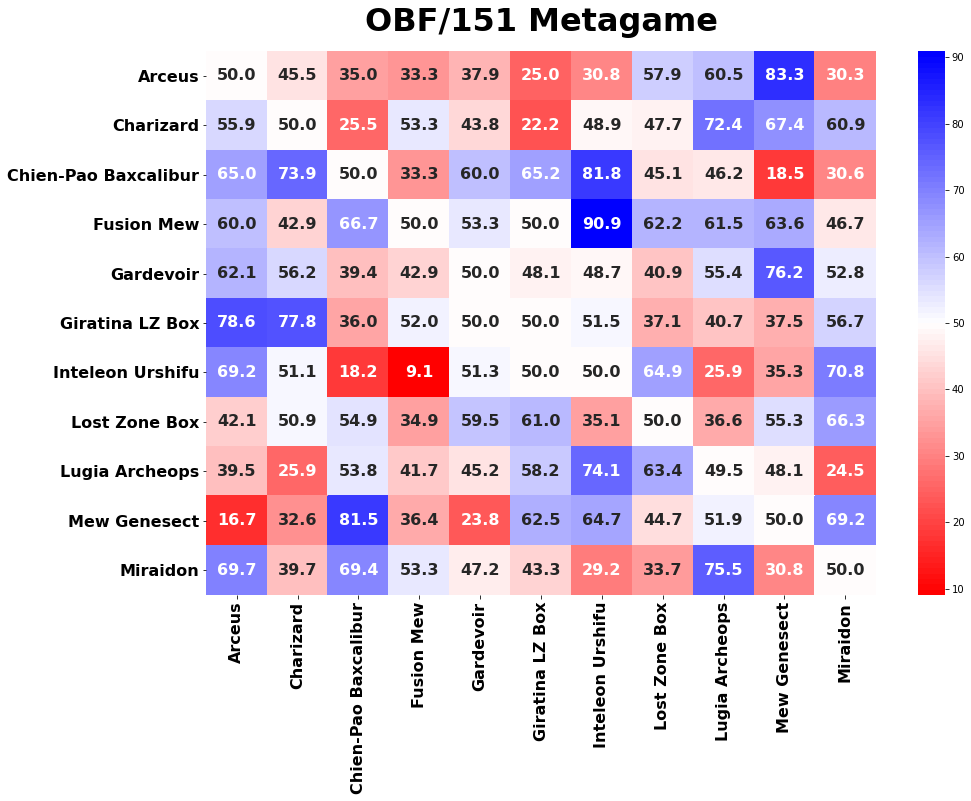

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
n_bins = 100  # Number of bins
cmap_name = 'custom1'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
custom_cmap.set_bad(color='black')

plt.figure(figsize=(15, 10))
ax = sns.heatmap(OBF151_matchups_percents, annot=True, cmap=custom_cmap, fmt=".1f", 
            annot_kws={"weight": "bold", "size": 16})


plt.xticks(fontweight='bold', fontsize= 16)
plt.yticks(fontweight='bold', fontsize= 16)

plt.title('OBF/151 Metagame', fontweight='bold', fontsize= 32, pad=20)


plt.show()


In [188]:
online_tourney_data = pd.read_csv('/Users/horacemann/pokemon/2023-2024 metagame analysis/play_limitless_data.csv')
online_tourney_data=online_tourney_data.drop(columns='total')

online_tourney_data_unique = online_tourney_data.drop_duplicates(subset=['deck1', 'deck2'])

online_tourney_data_unique
pivoted_df = online_tourney_data_unique.pivot(index='deck1', columns='deck2', values='win_rate')

pivoted_df.iloc[8] = pivoted_df.iloc[[8, 11]].mean()

pivoted_df=pivoted_df.drop(index='*Single Strike Lugia')

pivoted_df

deck2,Arceus,Charizard,Chien-Pao Baxcalibur,Fusion Mew,Gardevoir,Giratina LZ Box,Inteleon Urshifu,Lost Zone Box,Lugia Archeops,Mew Genesect,Miraidon Flaaffy,Single Strike Lugia
deck1,,,,,,,,,,,,
*Arceus,50.0,55.8,50.7,50.0,40.6,41.20,17.60,66.70,58.5,70.8,35.60,66.7
*Charizard,44.2,50.0,43.6,65.3,48.9,42.90,40.30,50.00,56.2,65.4,56.20,63.2
*Chien-Pao Baxcalibur,49.3,56.4,50.0,44.0,51.1,44.00,48.70,39.40,44.7,37.6,43.00,43.3
*Fusion Mew,50.0,34.7,56.0,50.0,52.7,45.40,78.90,49.60,50.0,50.0,57.30,44.8
*Gardevoir,59.4,51.1,48.9,47.3,50.0,51.80,50.90,47.30,53.3,58.9,50.70,51.1
*Giratina LZ Box,58.8,57.1,56.0,54.6,48.2,50.00,47.00,47.30,37.7,46.4,59.60,40.4
*Inteleon Urshifu,82.4,59.7,51.3,21.1,49.1,53.00,50.00,51.90,21.5,39.6,58.00,38.6
*Lost Zone Box,33.3,50.0,60.6,50.4,52.7,52.70,48.10,50.00,36.9,43.3,54.90,42.4
*Lugia Archeops,37.4,40.3,56.0,52.6,47.8,60.95,69.95,60.35,46.2,47.8,36.25,53.8


In [ ]:
#calculate expected winrate of each deck based on meta share
#calculate expected win rate of each player's deck based on their matchups

In [153]:
stats = pd.DataFrame(all_decks_consolidated['Deck'].value_counts())
stats = stats.sort_index(axis=0)
stats['Meta_share'] = (stats['Deck']/stats['Deck'].sum())
stats['Expected Win Percentage'] = np.dot(OBF151_matchups_percents, stats['Meta_share'])

stats

,Deck,Meta_share,Expected Win Percentage
Arceus,38,0.046972,45.321261
Charizard,103,0.127318,49.714957
Chien-Pao Baxcalibur,57,0.070457,53.129419
Fusion Mew,31,0.038319,57.737206
Gardevoir,104,0.128554,50.613350
Giratina LZ Box,67,0.082818,50.641904
Inteleon Urshifu,52,0.064277,48.245117
Lost Zone Box,144,0.177998,50.728554
Lugia Archeops,102,0.126082,47.901978
Mew Genesect,37,0.045735,47.583189


In [ ]:
#take into CP for the decks played - "regress out the CP"
    #take leaderboard data and merge with player/deck/matchup table (before i drop player names) to include CP totals
    #can also do day 2 invitees and see how they compare to day 1 players
#change the size of the numbers to express number of games played